In [4]:
import pandas as pd
import numpy as np

In [5]:
# read files
df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')


In [6]:
# concat dataframes
df = pd.concat([df1, df2, df3, df4, df5])

In [7]:
# show 5 firts rows
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [8]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
109,Natal,2019-01-02,124.37,1035,1
171,Salvador,2019-01-02,136.45,1035,3
29,Recife,2019-01-01,10.18,980,8
79,Recife,2019-01-01,14.53,983,6
96,Salvador,2019-01-01,42.94,1034,3


In [9]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [10]:
df['LojaID'] = df['LojaID'].astype('object')

In [11]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [12]:
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [13]:
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [14]:
df

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08
...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84
236,Salvador,2019-01-03,126.29,1035,3,378.87
237,Salvador,2019-01-03,38.06,1036,3,114.18
238,Salvador,2019-01-03,139.64,1035,1,139.64


In [15]:
df['Receita'].min()

3.34

In [16]:
df['Receita'].max()

3544.0

In [17]:
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [18]:
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [19]:
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [20]:
df.sort_values('Receita', ascending=False).head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0


#Trabalhando com Datas

In [21]:
#Transform column date to int type
df['Data'] = df['Data'].astype('int64')

In [22]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [23]:
df['Data'] = pd.to_datetime(df['Data'])

In [24]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [25]:
# group by year
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [26]:
# create new column year
df['ano_venda'] = df['Data'].dt.year
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,ano_venda
80,Salvador,2019-01-01,40.24,1036,2,80.48,2019
141,Fortaleza,2019-03-02,182.75,983,8,1462.00,2019
75,Fortaleza,2019-01-01,19.99,1005,4,79.96,2019
190,Salvador,2019-01-02,78.78,1035,3,236.34,2019
129,Fortaleza,2019-03-02,35.34,982,7,247.38,2019


In [27]:
# extraindo mes e dia
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,ano_venda,mes_venda,dia_venda
107,Aracaju,2018-01-01,142.57,1523,3,427.71,2018,1,1
119,Fortaleza,2019-03-02,152.30,982,7,1066.10,2019,3,2
224,Natal,2019-01-02,178.30,1035,3,534.90,2019,1,2
111,Recife,2019-03-02,8.00,981,3,24.00,2019,3,2
60,Aracaju,2018-01-01,215.88,1521,3,647.64,2018,1,1


In [28]:
# data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [29]:
# calculando a diferenca de dias
df['diferenca_dias'] = df['Data'] - df['Data'].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,ano_venda,mes_venda,dia_venda,diferenca_dias
230,Natal,2019-01-03,184.69,1036,1,184.69,2019,1,3,367 days
63,Aracaju,2018-01-01,39.87,1522,5,199.35,2018,1,1,0 days
28,Aracaju,2018-01-01,114.93,1520,5,574.65,2018,1,1,0 days
98,Fortaleza,2019-01-01,15.00,1005,2,30.00,2019,1,1,365 days
32,Recife,2019-01-01,15.93,982,7,111.51,2019,1,1,365 days


In [30]:
# coluna trimestre
df['trimestre_venda'] = df['Data'].dt.quarter
df.sort_values('trimestre_venda', ascending=False).head(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
37,Natal,2018-10-03,726.0,852,2,1452.0,2018,10,3,275 days,4
10,Natal,2018-10-27,828.0,852,4,3312.0,2018,10,27,299 days,4
58,Natal,2018-12-23,272.0,853,3,816.0,2018,12,23,356 days,4
1,Natal,2018-11-25,563.0,853,2,1126.0,2018,11,25,328 days,4
54,Natal,2018-10-03,373.0,852,4,1492.0,2018,10,3,275 days,4


In [31]:
# vendas de março de 2019
vendas_marco_2019 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]
vendas_marco_2019.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
122,Fortaleza,2019-03-02,235.06,983,3,705.18,2019,3,2,425 days,1
120,Fortaleza,2019-03-02,184.90,982,4,739.60,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
69,Natal,2019-03-24,817.00,852,4,3268.00,2019,3,24,447 days,1
18,Natal,2019-03-14,581.00,853,3,1743.00,2019,3,14,437 days,1


#Visualização de Dados

In [32]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

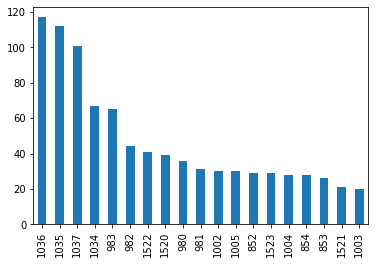

In [33]:
# Gráfico de barras
df['LojaID'].value_counts(ascending=False).plot.bar()

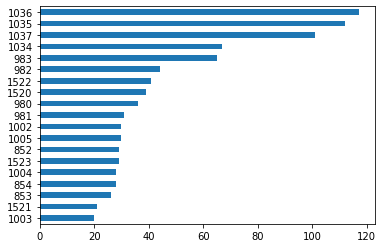

In [34]:
# Gráfico de barras horizontais
df['LojaID'].value_counts(ascending=True).plot.barh();

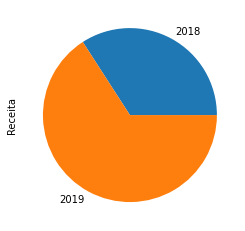

In [35]:
# Gráfico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [36]:
# Total de vendas por cidade
df['Cidade'].value_counts()

Salvador     240
Natal        240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

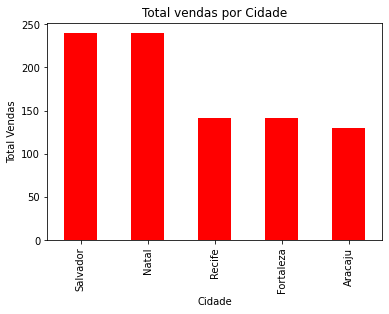

In [37]:
# Adicionando titulo e nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total vendas por Cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

In [38]:
# Alterando o estilo
plt.style.use('ggplot')

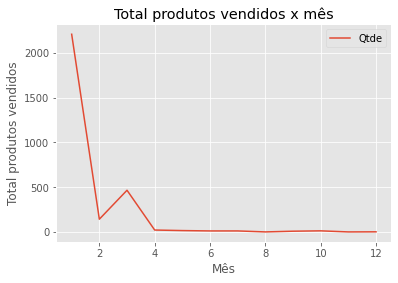

In [39]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title='Total produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos')
plt.legend();

In [40]:
# Vendas de 2019
df_2019 = df[df['ano_venda'] == 2019]

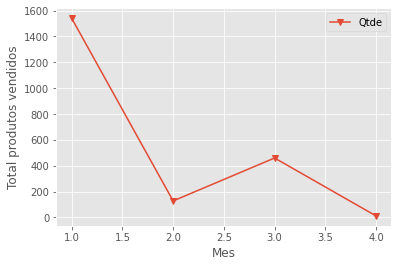

In [41]:
# Total produtos vendidos por mês
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker="v")
plt.xlabel('Mes')
plt.ylabel('Total produtos vendidos')
plt.legend();

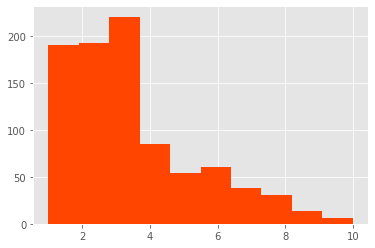

In [44]:
# Histograma
plt.hist(df['Qtde'], color= 'orangered');

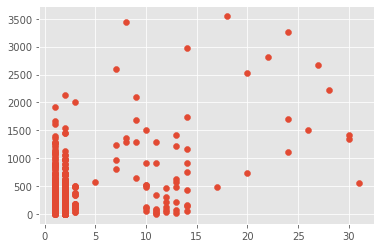

In [45]:
# Dispersao
plt.scatter(x= df_2019['dia_venda'], y= df_2019['Receita'])

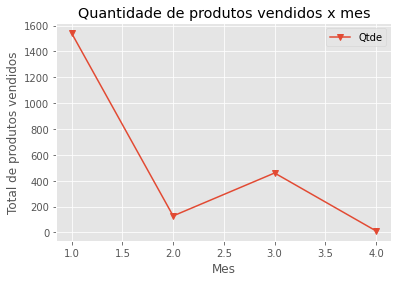

In [46]:
# Salvando em png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker= 'v')
plt.title('Quantidade de produtos vendidos x mes')
plt.xlabel('Mes')
plt.ylabel('Total de produtos vendidos');
plt.legend()
plt.savefig('grafico quantidade X mes.png')